# Análisis de Datos "Sueldos IT en Argentina"
## Lucas Martín Treser

Analisis en base a los resultados de la Encuesta de sueldos 2023.2 por el grupo "SysArmy".

### Tema a abordar
Sysarmy es una comunidad de sistemas que nuclea a profesionales del área para favorecer el contacto y el intercambio de conocimiento de manera informal. Desde el 2014 realizan una encuesta anónima para saber cómo se encuentran los sysadmins (y otros profesionales) en su ambiente laboral, a partir de la cual se desprenden distintos analisis de datos para brindar información sobre la industria IT en Argentina.

### Búsqueda de datos
 
Los datos que voy a utilizar corresponden a un dataset que se encuentra disponible en el siguiente [enlace](https://sysarmy.com/blog/posts/resultados-de-la-encuesta-de-sueldos-2023-2/). El dataset refiere a una encuesta anónima donde se relevan datos tanto salariales como de condiciones laborales en el sector IT de nuestro país.

### Carga e información general del Dataset

Para trabajar en el analisis voy a utilizar la biblioteca Pandas junto a otras vistas en clase.
Pandas es una de las bibliotecas más utilizadas para analizar y manipular datos. Nos permite trabajar con una nueva estructura de datos, los _Data Frame_, que permite visualizar los datos en forma de tabla. Además proporciona una gran cantidad de funciones para manipular y transformar los Data Frame de forma sencilla, rápida y cómoda, proporcionando herramientas para poder leer datos y convertirlos en Data Frames de forma automática.

<ul>  
  <li>Pandas >>> <a href="https://pandas.pydata.org/">pandas.pydata.org</a></li>
  <li>Numpy >>> <a href="https://numpy.org/">numpy.org</a></li>
  <li>MatPLotLib >>> <a href="https://matplotlib.org/">matplotlib.org</a></li>
  <li>Seaborn >>> <a href="https://seaborn.pydata.org/">seaborn.pydata.org</a></li>
</ul> 

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=None
sysarmy_data = pd.read_csv("2023_Sysarmy_Encuesta_remuneración_salarial.csv")

In [291]:
# Información general del dataset
datos = sysarmy_data.info()
print("Resumen general del dataset: \n\n", datos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5805 entries, 0 to 5804
Data columns (total 43 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   Estoy trabajando en                                                                   5805 non-null   object 
 1   Dónde estás trabajando                                                                5805 non-null   object 
 2   Dedicación                                                                            5805 non-null   object 
 3   Tipo de contrato                                                                      5805 non-null   object 
 4   Último salario mensual  o retiro BRUTO (en tu moneda local)                           5805 non-null   float64
 5   Último salario mensual o retiro NETO (en tu moneda local)                          

### Análisis exploratorio
 
Revisaremos y mostraremos:

    - cuántas variables y registros tiene el dataset
    - los primeros y últimos registros
    - los tipos de datos y las características general del dataset 
    
Exploraremos las columnas para ver cómo están armadas:

    - de tipo categóricas
    - de tipo numéricas

In [292]:
# Tamaño del dataset
reg_tam = str(sysarmy_data.shape)
print("El dataset contiene:", reg_tam[1:5], "filas y", reg_tam[7:9],"columnas")

El dataset contiene: 5805 filas y 43 columnas


In [293]:
# Mostrar los primeros 10 registros del dataset
reg_head = sysarmy_data.head(10)
print("Los primeros registros son: \n\n", reg_head)

Los primeros registros son: 

   Estoy trabajando en Dónde estás trabajando Dedicación  \
0           Argentina              Catamarca  Full-Time   
1           Argentina              Catamarca  Full-Time   
2           Argentina              Catamarca  Full-Time   
3           Argentina                  Chaco  Part-Time   
4           Argentina                  Chaco  Full-Time   
5           Argentina                  Chaco  Full-Time   
6           Argentina                  Chaco  Full-Time   
7           Argentina                  Chaco  Full-Time   
8           Argentina                  Chaco  Full-Time   
9           Argentina                  Chaco  Full-Time   

                                    Tipo de contrato  \
0                          Staff (planta permanente)   
1                          Staff (planta permanente)   
2                          Staff (planta permanente)   
3                          Staff (planta permanente)   
4  Tercerizado (trabajo a través de con

In [294]:
# Mostrar los últimos 10 registros del dataset
reg_tail = sysarmy_data.tail(10)
print("Los ultimos registros son: \n\n", reg_tail)

Los ultimos registros son: 

      Estoy trabajando en Dónde estás trabajando Dedicación  \
5795           Argentina                Tucumán  Full-Time   
5796           Argentina                Tucumán  Full-Time   
5797           Argentina                Tucumán  Full-Time   
5798           Argentina                Tucumán  Full-Time   
5799           Argentina                Tucumán  Full-Time   
5800           Argentina                Tucumán  Full-Time   
5801           Argentina                Tucumán  Full-Time   
5802           Argentina                Tucumán  Full-Time   
5803           Argentina                Tucumán  Full-Time   
5804           Argentina                Tucumán  Part-Time   

                                       Tipo de contrato  \
5795                          Staff (planta permanente)   
5796                          Staff (planta permanente)   
5797                          Staff (planta permanente)   
5798                          Staff (planta permane

In [295]:
# Lista con nombres de las columnas
columnas = sysarmy_data.columns
print("Listado de columnas: \n\n", columnas)

Listado de columnas: 

 Index(['Estoy trabajando en', 'Dónde estás trabajando', 'Dedicación',
       'Tipo de contrato',
       'Último salario mensual  o retiro BRUTO (en tu moneda local)',
       'Último salario mensual o retiro NETO (en tu moneda local)',
       'Pagos en dólares',
       'Si tu sueldo está dolarizado ¿Cuál fue el último valor del dólar que tomaron?',
       'Recibís algún tipo de bono', 'A qué está atado el bono',
       '¿Tuviste actualizaciones de tus ingresos laborales durante 2023?',
       '¿De qué % fue el ajuste total acumulado?',
       '¿En qué mes fue el último ajuste?',
       'Cómo considerás que están tus ingresos laborales comparados con el semestre anterior',
       '¿Contás con beneficios adicionales?',
       '¿Qué tan conforme estás con tus ingresos laborales?', 'Trabajo de',
       'Años de experiencia', 'Antigüedad en la empresa actual',
       'Tiempo en el puesto actual', '¿Cuántas personas a cargo tenés?',
       'Plataformas que utilizas en 

In [296]:
# Tipos de datos
tipos = sysarmy_data.dtypes
print("Los tipos de datos que contiene el dataset son:\n\n", tipos)

Los tipos de datos que contiene el dataset son:

 Estoy trabajando en                                                                      object
Dónde estás trabajando                                                                   object
Dedicación                                                                               object
Tipo de contrato                                                                         object
Último salario mensual  o retiro BRUTO (en tu moneda local)                             float64
Último salario mensual o retiro NETO (en tu moneda local)                               float64
Pagos en dólares                                                                         object
Si tu sueldo está dolarizado ¿Cuál fue el último valor del dólar que tomaron?            object
Recibís algún tipo de bono                                                               object
A qué está atado el bono                                                              

### Limpieza del _dataset_

En esta etapa voy a limpiar los datos según lo aprendido sobre calidad de los datos. Las columnas con las que trabajare son:

    - Tengo (edad)                                                                  int64
    - Máximo nivel de estudios                                                      object
    - Dónde estás trabajando                                                        object
    - Trabajo de                                                                    object
    - Dedicación                                                                    object
    - Modalidad de trabajo                                                          object
    - Lenguajes de programación o tecnologías que utilices en tu puesto actual      object
    - Último salario mensual  o retiro BRUTO (en tu moneda local)                   float64
    - Último salario mensual o retiro NETO (en tu moneda local)                     float64
    - Pagos en dólares                                                              object  
    - ¿De qué % fue el ajuste total acumulado?                                      float64                              
    - ¿Qué tan conforme estás con tus ingresos laborales?                           int64

In [297]:
# Modificar el dataset, creando uno nuevo sin las columnas especificadas
columnas_drop =  ['Estoy trabajando en', 'Tipo de contrato',
                    'Si tu sueldo está dolarizado ¿Cuál fue el último valor del dólar que tomaron?',
                    'Recibís algún tipo de bono', 'A qué está atado el bono',
                    '¿Tuviste actualizaciones de tus ingresos laborales durante 2023?',
                    '¿En qué mes fue el último ajuste?',
                    'Cómo considerás que están tus ingresos laborales comparados con el semestre anterior',
                    '¿Contás con beneficios adicionales?',
                    'Años de experiencia', 'Antigüedad en la empresa actual',
                    'Tiempo en el puesto actual', '¿Cuántas personas a cargo tenés?',
                    'Plataformas que utilizas en tu puesto actual',
                    'Frameworks, herramientas y librerías que utilices en tu puesto actual',
                    'Bases de datos', 'QA / Testing',
                    'Cantidad de personas en tu organización',
                    'Si trabajás bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
                    '¿La recomendás como un buen lugar para trabajar?',
                    '¿Qué tanto estás usando Copilot, ChatGPT u otras herramientas de IA para tu trabajo?',
                    '¿Salir o seguir contestando?', 'Estado',
                    'Carrera', 'Institución educativa',
                    '¿Salir o seguir contestando sobre las guardias?', '¿Tenés guardias?',
                    'Cuánto cobrás por guardia',
                    'Aclará el número que ingresaste en el campo anterior',
                    '¿Salir o seguir contestando sobre estudios?',
                    'Me identifico (género)']

datos_limpios = sysarmy_data.drop(columns=columnas_drop)

In [298]:
# Nuevo dataset
datos_limpios.rename(columns={"Último salario mensual  o retiro BRUTO (en tu moneda local)" : 
                                "Último salario mensual o retiro BRUTO (en tu moneda local)"}, inplace=True)
columnas_limpias = datos_limpios.columns
print("\n\nListado de columnas del nuevo dataset: \n\n", columnas_limpias)



Listado de columnas del nuevo dataset: 

 Index(['Dónde estás trabajando', 'Dedicación',
       'Último salario mensual o retiro BRUTO (en tu moneda local)',
       'Último salario mensual o retiro NETO (en tu moneda local)',
       'Pagos en dólares', '¿De qué % fue el ajuste total acumulado?',
       '¿Qué tan conforme estás con tus ingresos laborales?', 'Trabajo de',
       'Lenguajes de programación o tecnologías que utilices en tu puesto actual',
       'Modalidad de trabajo', 'Máximo nivel de estudios', 'Tengo (edad)'],
      dtype='object')


In [299]:
# Datos nulos
nulos = datos_limpios.isnull()
print("Datos nulos en el dataset:\n\n")
nulos

Datos nulos en el dataset:




,Dónde estás trabajando,Dedicación,Último salario mensual o retiro BRUTO (en tu moneda local),Último salario mensual o retiro NETO (en tu moneda local),Pagos en dólares,¿De qué % fue el ajuste total acumulado?,¿Qué tan conforme estás con tus ingresos laborales?,Trabajo de,Lenguajes de programación o tecnologías que utilices en tu puesto actual,Modalidad de trabajo,Máximo nivel de estudios,Tengo (edad)
0,False,False,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,True,False
3,False,False,False,False,True,False,False,False,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5800,False,False,False,False,False,False,False,False,False,False,False,False
5801,False,False,False,False,True,False,False,False,False,False,True,False
5802,False,False,False,False,False,False,False,False,False,False,True,False
5803,False,False,False,False,False,False,False,False,False,False,False,False


In [300]:
# Cantidad de datos nulos en cada columna
total_nulos = nulos.sum()
print("Cantidad de datos nulos por columna:\n\n", total_nulos)

Cantidad de datos nulos por columna:

 Dónde estás trabajando                                                         0
Dedicación                                                                     0
Último salario mensual o retiro BRUTO (en tu moneda local)                     0
Último salario mensual o retiro NETO (en tu moneda local)                    239
Pagos en dólares                                                            3865
¿De qué % fue el ajuste total acumulado?                                       0
¿Qué tan conforme estás con tus ingresos laborales?                            0
Trabajo de                                                                     0
Lenguajes de programación o tecnologías que utilices en tu puesto actual       2
Modalidad de trabajo                                                           0
Máximo nivel de estudios                                                    3192
Tengo (edad)                                                          

In [301]:
# Tratamiento de los datos nulos en la columna "Lenguajes de..."
columna_lng = "Lenguajes de programación o tecnologías que utilices en tu puesto actual"
mask_lng = datos_limpios[columna_lng].isnull()
datos_limpios.loc[mask_lng]

,Dónde estás trabajando,Dedicación,Último salario mensual o retiro BRUTO (en tu moneda local),Último salario mensual o retiro NETO (en tu moneda local),Pagos en dólares,¿De qué % fue el ajuste total acumulado?,¿Qué tan conforme estás con tus ingresos laborales?,Trabajo de,Lenguajes de programación o tecnologías que utilices en tu puesto actual,Modalidad de trabajo,Máximo nivel de estudios,Tengo (edad)
1918,Ciudad Autónoma de Buenos Aires,Full-Time,620000.0,500000.0,NaN,40.0,3,Scrum Master,NaN,100% remoto,NaN,41
4681,Provincia de Buenos Aires,Full-Time,221960.0,216960.0,Mi sueldo está dolarizado (pero cobro en moned...,0.0,3,Developer,NaN,100% remoto,NaN,27


In [302]:
# Reemplazo de datos nulos, primera posibilidad
datos_limpios.at[1918, columna_lng] = "No responde"
datos_limpios.at[4681, columna_lng] = "No responde"
datos_limpios.iloc[4681]

Dónde estás trabajando                                                                              Provincia de Buenos Aires
Dedicación                                                                                                          Full-Time
Último salario mensual o retiro BRUTO (en tu moneda local)                                                           221960.0
Último salario mensual o retiro NETO (en tu moneda local)                                                            216960.0
Pagos en dólares                                                            Mi sueldo está dolarizado (pero cobro en moned...
¿De qué % fue el ajuste total acumulado?                                                                                  0.0
¿Qué tan conforme estás con tus ingresos laborales?                                                                         3
Trabajo de                                                                                                          De

In [303]:
# Tratamiento de los datos nulos en el resto de las columnas, otra posibilidad
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
columna_est = "Máximo nivel de estudios"
columna_neto = "Último salario mensual o retiro NETO (en tu moneda local)"
columna_dolares = "Pagos en dólares"
datos_limpios[columna_est].fillna("No responde", inplace=True)
datos_limpios[columna_neto].fillna(0, inplace=True)
datos_limpios[columna_dolares].fillna("No responde", inplace=True)

In [304]:
# Cantidad de datos nulos al finalizar la limpieza
datos_limpios.isnull().sum()

Dónde estás trabajando                                                      0
Dedicación                                                                  0
Último salario mensual o retiro BRUTO (en tu moneda local)                  0
Último salario mensual o retiro NETO (en tu moneda local)                   0
Pagos en dólares                                                            0
¿De qué % fue el ajuste total acumulado?                                    0
¿Qué tan conforme estás con tus ingresos laborales?                         0
Trabajo de                                                                  0
Lenguajes de programación o tecnologías que utilices en tu puesto actual    0
Modalidad de trabajo                                                        0
Máximo nivel de estudios                                                    0
Tengo (edad)                                                                0
dtype: int64

In [305]:
# Para evitar analisis erroneos, convertiremos los números a enteros
columna1 = "Último salario mensual o retiro BRUTO (en tu moneda local)"
columna2 = "Último salario mensual o retiro NETO (en tu moneda local)"
datos_limpios[columna1] = datos_limpios[columna1].astype('int64')
datos_limpios[columna2] = datos_limpios[columna2].astype('int64')

# Luego se descartaran registros por debajo de 9000
datos_limpios[columna1] = datos_limpios[columna1].apply(lambda x: 0 if x < 9000 else x)
datos_limpios[columna2] = datos_limpios[columna2].apply(lambda x: 0 if x < 9000 else x)

# Descartar valores de cero
datos_limpios["Brutos"] = datos_limpios[columna1].replace(0, np.nan)
datos_limpios["Netos"] = datos_limpios[columna2].replace(0, np.nan)

### Visualizaciones

Para presentar los datos visualmente utilizaré distintos tipos de gráficos:

    - Bar Charts: muestra la distribución de una variable categórica.
    - Pie Charts: muestra la proporción de cada categoría.
    - Histogramas: muestra la distribución de una variable numérica.
    - Scatter Plots: muestra la relación entre dos variables numéricas.
    - Box Plot: muestra la distribución y permite detectar valores atípicos.
    - Heatmaps: muestra la correlación entre variables.

Text(0, 0.5, 'Provincia')

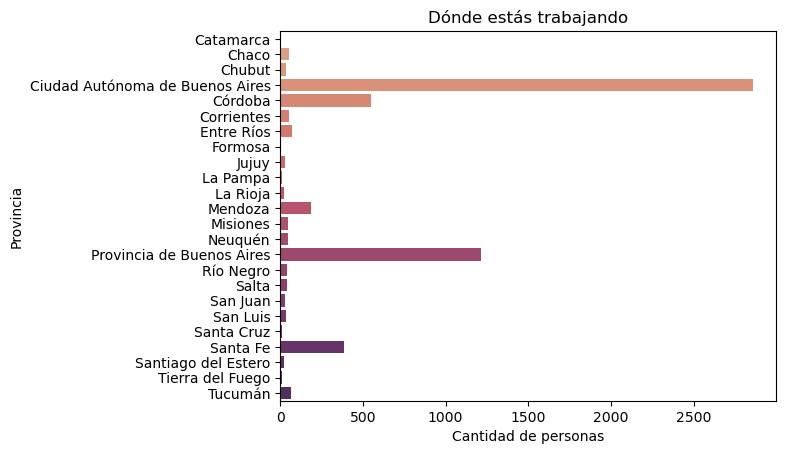

In [306]:
# gráfico de barras que permite visualizar la cantidad de registros por determinada columna.
# https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplotde
columna = "Dónde estás trabajando"
graf = datos_limpios[columna].value_counts().sort_values(ascending=False)

sns.countplot(y=datos_limpios[columna], palette="flare")
plt.title("Dónde estás trabajando")
plt.xlabel("Cantidad de personas")
plt.ylabel("Provincia")

Text(0.5, 1.0, 'Dedicación')

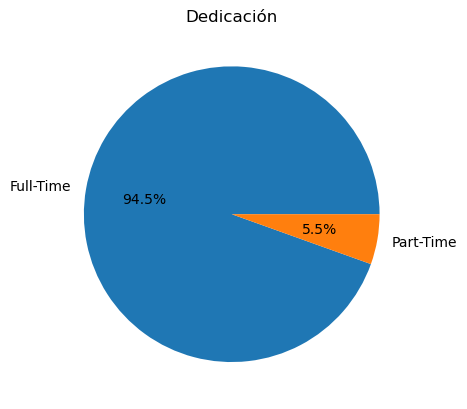

In [307]:
# Crear un gráfico de torta con Matplotlib
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
full_part = datos_limpios["Dedicación"].value_counts()
plt.pie(full_part, labels=full_part.index, autopct='%1.1f%%')
plt.title("Dedicación")

<AxesSubplot: xlabel='Tengo (edad)', ylabel='Dónde estás trabajando'>

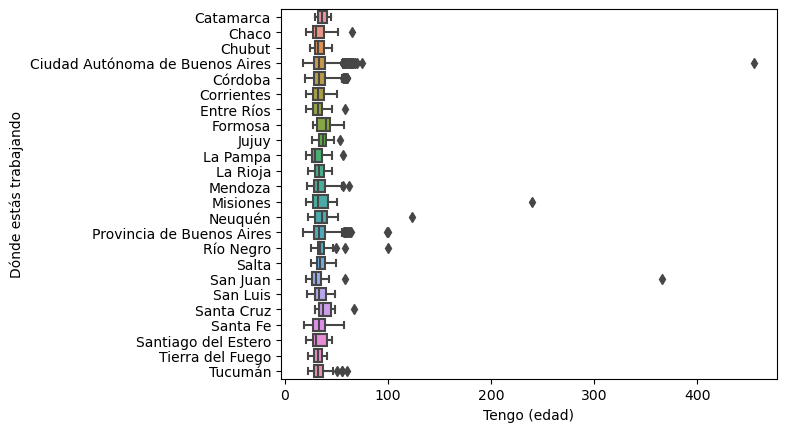

In [308]:
# Boxplot, edad por provincia
sns.boxplot(data=datos_limpios, x="Tengo (edad)", y="Dónde estás trabajando")

Text(0, 0.5, 'Sueldos Netos')

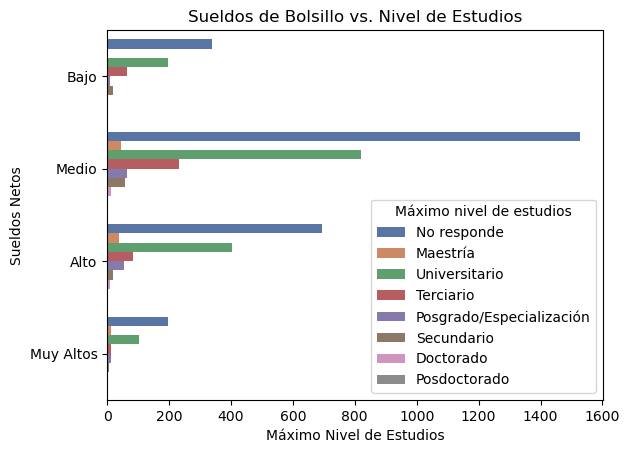

In [309]:
# Salarios por Nivel Educativo
columna1 = "Netos"
columna2 = "Máximo nivel de estudios"
columna3 = "Categorias Sueldos Netos"

# Definir categorías más representativas para los sueldos
catesueldos = pd.cut(datos_limpios[columna1], bins=[40000, 200000, 500000, 1000000, 2000000] , 
                        labels=["Bajo", "Medio", "Alto", "Muy Altos"])
datos_limpios[columna3] = catesueldos

sns.countplot(y=datos_limpios[columna3], hue=datos_limpios[columna2], palette="deep")
plt.title("Sueldos de Bolsillo vs. Nivel de Estudios")
plt.xlabel("Máximo Nivel de Estudios")
plt.ylabel("Sueldos Netos")

In [310]:
# Algunos cálculos con los salarios mensuales netos
columna = "Netos"
sueldos_media = int(datos_limpios[columna].mean())
sueldos_moda = int(datos_limpios[columna].mode())
sueldos_max = int(datos_limpios[columna].max())
sueldos_min = int(datos_limpios[columna].min())

print("El salario neto promedio es:", sueldos_media)
print("El salario que más se repite es:", sueldos_moda)
print("El salario minimo es:", sueldos_min)
print("El salario maximo es:", sueldos_max)

El salario neto promedio es: 600567
El salario que más se repite es: 500000
El salario minimo es: 10000
El salario maximo es: 45000000


Text(0.5, 0, 'Estadísticas')

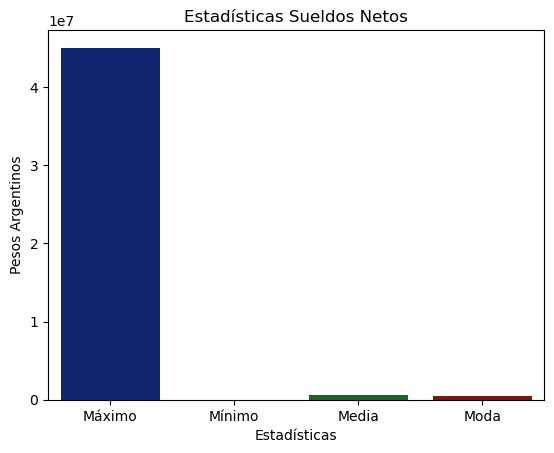

In [311]:
sns.barplot(x=["Máximo", "Mínimo", "Media", "Moda"], 
                y=[sueldos_max, sueldos_min, sueldos_media, sueldos_moda], palette="dark")

plt.title("Estadísticas Sueldos Netos")
plt.ylabel("Pesos Argentinos")
plt.xlabel("Estadísticas")

Text(0, 0.5, 'Frecuencia')

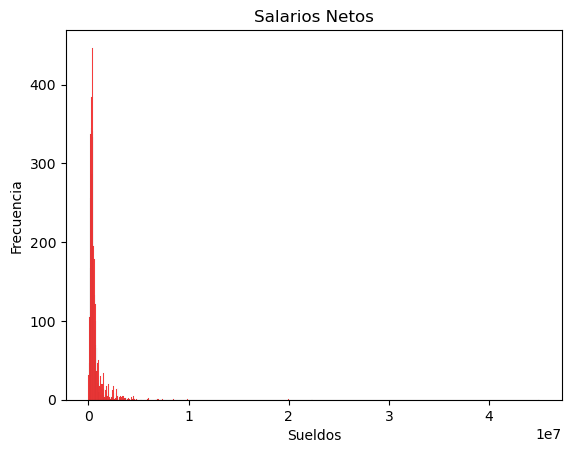

In [312]:
# Histogramas: muestra la distribución de una variable numérica.
columna = "Netos"
sns.histplot(datos_limpios[columna], kde=False, color="red")

plt.title("Salarios Netos")
plt.xlabel('Sueldos')
plt.ylabel('Frecuencia')

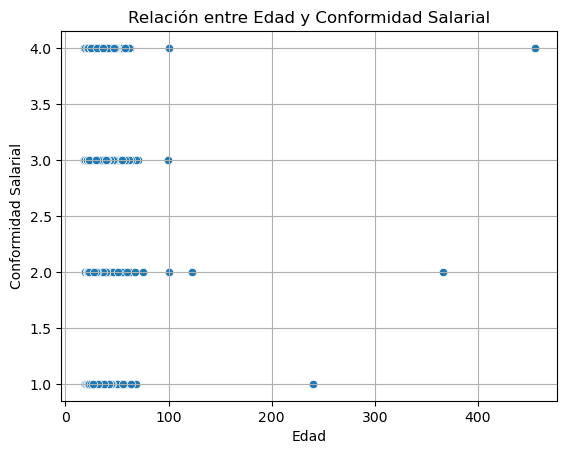

In [313]:
# Relación entre dos variables numéricas
columna1 = "Tengo (edad)"
columna2 = "¿Qué tan conforme estás con tus ingresos laborales?"
sns.scatterplot(data=datos_limpios, x=columna1, y=columna2)

plt.title("Relación entre Edad y Conformidad Salarial")
plt.xlabel("Edad")
plt.ylabel("Conformidad Salarial")
plt.grid(True)

<AxesSubplot: >

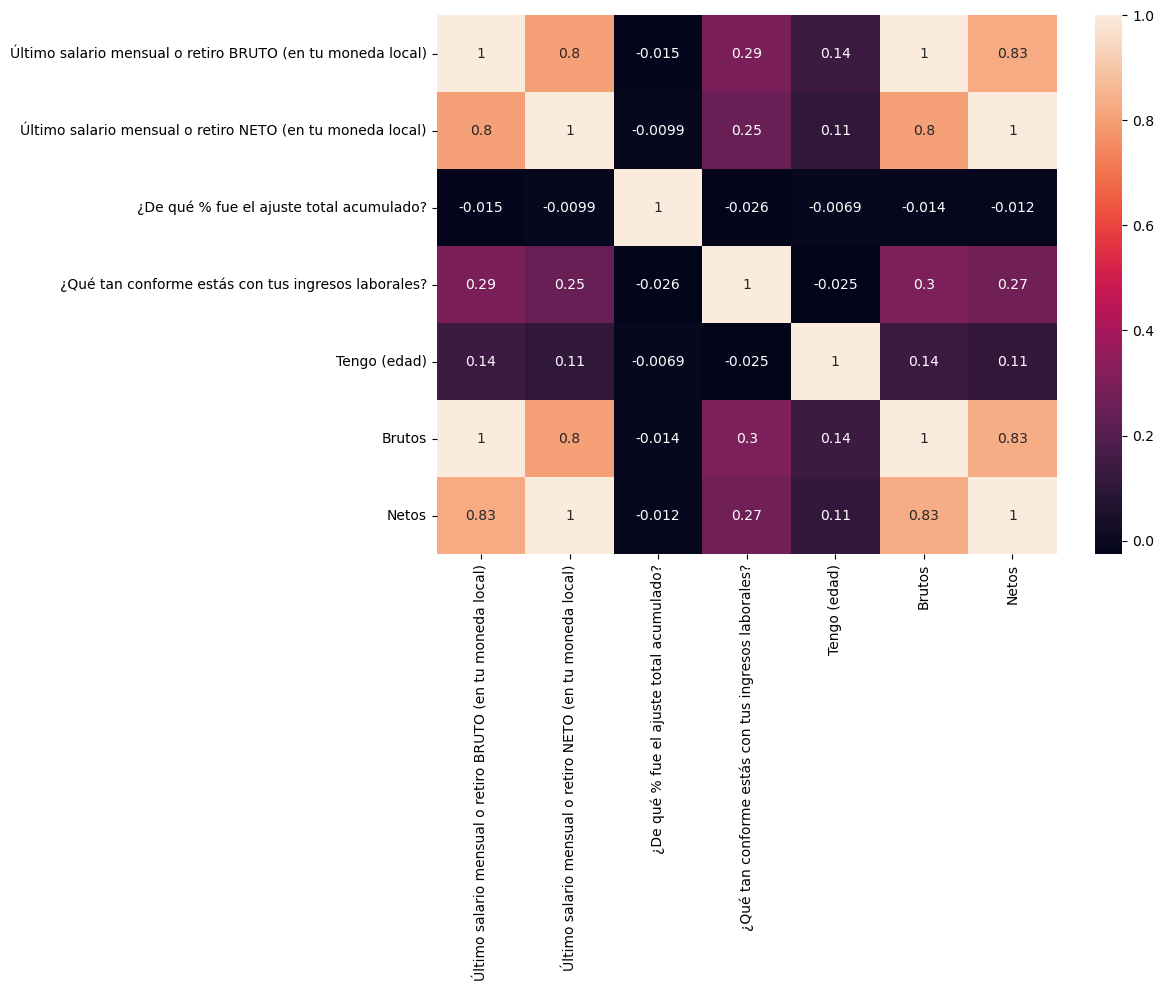

In [314]:
# Heatmaps: muestra la correlación entre variables.
plt.figure(figsize=(10, 7))
sns.heatmap(datos_limpios.corr(numeric_only=True), annot=True)